In [2]:
import pandas as df
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Print data

In [26]:
path_data = 'data/sxy18_T10.nc'
#ds_init = xr.open_dataset(f'../data/external_data/ClimateData/{state_name}.nc')
ds_init = xr.open_dataset(path_data)
df_init = ds_init.to_dataframe()
#len(df_init.index.levels[3])

In [28]:
df_init.reset_index(inplace=True)
#df_init

In [5]:
couche0 = df_init[df_init['z']==0].drop(columns=['t','x','y','z'])
couche0.head()

,sxy18
0,0.13189
1,0.13021
2,0.12685
3,0.12452
4,0.12587


In [6]:
arr = couche0.to_numpy()
arr.shape

(262144, 1)

In [7]:
arr2 = arr.reshape(512, 512)

In [8]:
arr2

array([[0.13189, 0.13021, 0.12685, ..., 0.15891, 0.1643 , 0.1542 ],
       [0.13218, 0.13122, 0.1254 , ..., 0.16622, 0.15173, 0.13493],
       [0.1298 , 0.14564, 0.12537, ..., 0.1465 , 0.15379, 0.15023],
       ...,
       [0.16436, 0.14845, 0.12471, ..., 0.14989, 0.14884, 0.16303],
       [0.14355, 0.14253, 0.12715, ..., 0.10688, 0.13554, 0.13936],
       [0.12186, 0.12255, 0.12751, ..., 0.14619, 0.14371, 0.12986]])

In [9]:
arr2.shape

(512, 512)

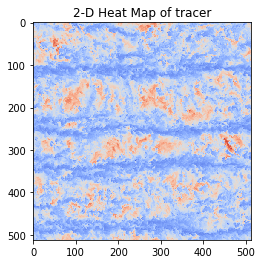

In [10]:
plt.imshow(arr2 , cmap = 'coolwarm' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map of tracer" )
plt.show()

In [11]:
def print_one_alt(path_data,color):
    ds_init = xr.open_dataset(path_data)
    df_init = ds_init.to_dataframe()
    df_init.reset_index(inplace=True)
    couche0 = df_init[df_init['z']==0].drop(columns=['t','x','y','z'])
    arr = couche0.to_numpy()
    arr2 = arr.reshape(512, 512)
    plt.imshow(arr2 , cmap = color , interpolation = 'nearest' )
    plt.title( "2-D Heat Map of tracer" )
    plt.show()

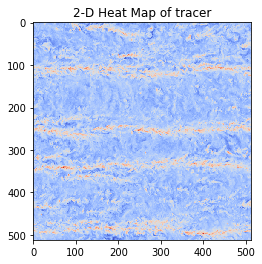

In [12]:
print_one_alt('data/wxy18_T10.nc','coolwarm')

## Get all data and stack altitude layers

In [124]:
path_data1 = 'data/sxy18_T10.nc'
ds_init = xr.open_dataset(path_data1)
df_init = ds_init.to_dataframe()
lengths = [len(df_init.index.levels[i]) for i in range(4)]
#df_init

In [125]:
arr1 = df_init.values.reshape(lengths[0],lengths[1],lengths[2],lengths[3]) #.swapaxes(2,3)  # arr[t][z][y][x]
#print(arr1)

In [74]:
path_data2 = 'data/sxy19_T10.nc'
ds_init2 = xr.open_dataset(path_data2)
df_init2 = ds_init2.to_dataframe()
lengths2 = [len(df_init2.index.levels[i]) for i in range(4)]
arr2 = df_init2.values.reshape(lengths2[0],lengths2[1],lengths2[2],lengths2[3])

In [80]:
arr_tot = np.concatenate((arr1,arr2),axis=1)
arr_tot.shape

(1, 4, 512, 512)

In [48]:
# path joining version for other paths
DIR = 'data'
print(os.listdir(DIR))
#print(len([name for name in os.listdir(DIR) if os.path.isname(os.path.join(DIR, name))]))

['uxy18_T10.nc', 'thetaxy19_T10.nc', 'vxy19_T10.nc', 'wxy18_T10.nc', 'sxy19_T10.nc', 'uxy19_T10.nc', 'vxy18_T10.nc', 'thetaxy18_T10.nc', 'sxy18_T10.nc', 'wxy19_T10.nc']


In [64]:
# number of files in a directory that contain a certain string
print(len([file for file in os.listdir(DIR) if  file.__contains__("sxy") and file.__contains__("_T10.nc")]))

2


In [65]:
import re

pattern = '(\d+)'
string = 'sxy19_T10.nc'
result = re.split(pattern, string)
print(result)

['sxy', '19', '_T', '10', '.nc']


In [86]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]
my_list =['sxy19_T10.nc', 'sxy18_T10.nc', 'sxy20_T9.nc']
my_list.sort(key=natural_keys)
print(my_list, natural_keys('sxy19_T10.nc'))

['sxy18_T10.nc', 'sxy19_T10.nc', 'sxy20_T9.nc'] ['sxy', 19, '_T', 10, '.nc']


In [77]:
def concatenate_alt(dir, variable, t):
    '''
    ## Description
    Concatenate all files in a directory over the altitude axis for a given variable and a given instant.
    File name format : '{variable}xy{alt}_T{t}.nc'.

    ## Parameters
    - dir (str): directory where the files are stored
    - variable (str) : name of the variable to concatenate
    - t (int) : time instant to concatenate
    '''
    files = [name for name in os.listdir(dir) if  name.__contains__(f"{variable}xy") and name.__contains__(f"_T{t}.nc")]
    lz = len(files)

    assert lz!=0, "there is no file for this variable and time instant"
    files.sort()

    #initialize array
    path_data = os.path.join(dir, files[0])
    ds_init = xr.open_dataset(path_data)
    df_init = ds_init.to_dataframe()
    lengths = [len(df_init.index.levels[i]) for i in range(4)]
    arr = df_init.values.reshape(lengths[0],lengths[1],lengths[2],lengths[3])

    # concatenate
    for z in range(1,lz):
        path_data = os.path.join(dir, files[z])
        ds_init = xr.open_dataset(path_data)
        df_init = ds_init.to_dataframe()
        lengths = [len(df_init.index.levels[i]) for i in range(4)]
        arr2 = df_init.values.reshape(lengths[0],lengths[1],lengths[2],lengths[3])
        arr = np.concatenate((arr,arr2),axis=1)

    return arr

In [119]:
concatenate_alt('data','theta',10)[0].shape

(4, 512, 512)

In [98]:
files = [name for name in os.listdir('data') if  name.__contains__(f"xy")]
temp = [int(re.split('(\d+)', name)[3]) for name in files]
times = [t for n, t in enumerate(temp) if t not in temp[:n]]
times.sort()
times

[10, 11]

In [122]:
def concatenate_time(dir,variable):
    '''
    ## Description
    Concatenate all files in a directory over the time axis for a given variable.
    File name format : '{variable}xy{alt}_T{t}.nc'.

    ## Parameters
    - dir (str): directory where the files are stored
    - variable (str) : name of the variable to concatenate
    '''
    files = [name for name in os.listdir(dir) if  name.__contains__(f"{variable}xy")]
    temp = [int(re.split('(\d+)', name)[3]) for name in files]
    times = [t for n, t in enumerate(temp) if t not in temp[:n]]
    times.sort()

    tot_arr = concatenate_alt(dir,variable,times[0])

    for t in range(1,len(times)) :
        t_arr = concatenate_alt(dir,variable,times[t])
        assert tot_arr.shape[1]==t_arr.shape[1], "total altitude is not equal for every instant"
        tot_arr = np.concatenate((tot_arr,t_arr),axis=0)
        
    return tot_arr

In [123]:
concatenate_time('data','s').shape

(2, 4, 512, 512)

## Preprocess the data